# Task 1. Master theorem
Implement a recursive function, that implements the following recursive formula (exponentiation by squaring):

$\large a^b = (a^{\lfloor \frac{b}{2}\rfloor})^2 * a^{(b \mod 2)}$

In [1]:
def exp(a, b):
    # write your code here instead of this line
    return 1 if b == 0 else 1 / (a ** -b) if b < 0 else a ** b
    
assert exp(30., 3) == 30. ** 3
assert exp(0., 4) == 0. ** 4
assert exp(4., 0) == 1. 
assert exp(-5., -2) == 1 / ((-5.) ** 2)

### Сomplexity estimation

Estimate a complexity $T(b)$ of the function using Master theorem.

$T(b) = ... $



$T(b) \in \mathcal{O}(...)$

### Experiment proof

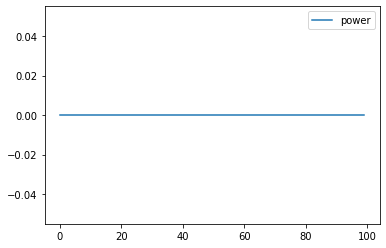

In [23]:
import matplotlib.pyplot as plt
B = list(range(100))
T = []

a = 1.1

for b in B:
    
    v = exp(a, b)
    # write your experiment code here
    T.append(0)
    
plt.plot(B, T, label="power")
plt.legend()
plt.show()

# Task 2. Branch and bound

Following function generates the nodes of a complete graph $K_{16}$. For the graph we have  couple of cool heiristics:
- Euclidean distance between 2 nodes is never less then 2. Thus, if $K$ edges remain, there cannot be less than $2K$ of remaining cycle length. Consider this case: $minimal < current + 2K \leq total$.  
- Euclidean distance between 2 sequential nodes in the shorted Hamiltonial circuit is less then 10.

{'A': (5.0, 0.0), 'B': (3.9834311042186856, 3.342495570370004), 'C': (0.9377001594014243, 5.317961866265923), 'D': (-2.7999999999999985, 4.849742261192857), 'E': (-5.450217200558268, 1.9837168312888795), 'F': (-5.638155724715451, -2.052120859954012), 'G': (-3.1000000000000028, -5.369357503463519), 'H': (1.111348337068352, -6.302769619278132), 'I': (5.055893324585253, -4.242398223931161), 'J': (6.8, -1.6655196468404002e-15), 'K': (5.362311101832847, 4.499513267805774)}


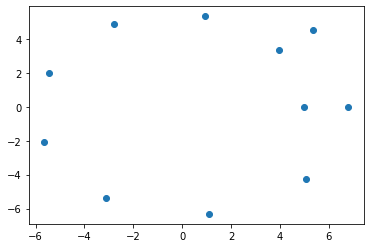

In [6]:
import math
import matplotlib.pyplot as plt

def get_nodes_as_dict():
    nodes = {}
    s = "ABCDEFGHIJK"
    for i, c in enumerate(s):
        x = (i / 5 + 5) * math.cos(i * math.pi / 4.5) 
        y = (i / 5 + 5) * math.sin(i * math.pi / 4.5)
        nodes[c] = (x, y)
    return nodes

print(get_nodes_as_dict())
X = [n[0] for n in get_nodes_as_dict().values()]
Y = [n[1] for n in get_nodes_as_dict().values()]

plt.scatter(X, Y)
plt.show()

Implement a **brute force** method which finds an optimal (shortest) Hamiltonial cycle in this graph. Then add **branch-and-bound** heuristics and compare 2 implementations in time and number of considered cycles.

In [7]:
nodes = get_nodes_as_dict()

def length(path, nodes):
    w = [nodes[n] for n in path]
    w += [w[0]]
    d = 0.
    for i in range(1, len(w)):
        d += ((w[i][0] - w[i-1][0]) ** 2 + (w[i][1] - w[i-1][1]) ** 2) ** .5
    return d

def get_best_brute(nodes):
    # implement here
    return "ABCDGHEFIJK"


def get_best_branch_bound(nodes):
    # implement here
    return "AFBCIJDEGHK"

In [ ]:
## write here the code to measure method time

### Visualize

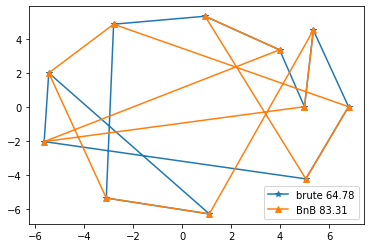

In [8]:
B = get_best_brute(nodes)
H = get_best_branch_bound(nodes)

X = [nodes[n][0] for n in B]
X += [X[0]]
Y = [nodes[n][1] for n in B]
Y += [Y[0]]

plt.plot(X, Y, marker="*", label=f"brute {length(B, nodes):.2f}")

X = [nodes[n][0] for n in H]
X += [X[0]]
Y = [nodes[n][1] for n in H]
Y += [Y[0]]

plt.plot(X, Y, marker="^", label=f"BnB {length(H, nodes):.2f}")
plt.legend()

plt.show()